In [4]:
import json
with open('./data/musae_git_features.json') as f:
    features_dict = json.load(f)


# 查看总共有多少节点的特征
print("Number of nodes with features:", len(features_dict))

# 随便打印一个节点的特征内容
for k in list(features_dict.keys())[:5]:
    print(f"Node {k}: Features -> {features_dict[k]}")

    

Number of nodes with features: 37700
Node 0: Features -> [1574, 3773, 3571, 2672, 2478, 2534, 3129, 3077, 1171, 2045, 1539, 902, 1532, 2472, 1122, 2480, 3098, 2115, 1578]
Node 1: Features -> [1193, 376, 73, 290, 3129, 1852, 3077, 1171, 1022, 2045, 536, 2040, 1533, 1532, 2472, 673, 798]
Node 2: Features -> [1574, 3773, 925, 1728, 2815, 2963, 3077, 364, 1171, 536, 1867, 2472, 1122, 2532, 664, 28, 3311, 1768, 869]
Node 3: Features -> [3964, 3773, 4003, 928, 1852, 3077, 364, 1022, 3763, 2045, 3859, 3771, 234, 664, 703]
Node 4: Features -> [1929, 3773, 1793, 3511, 1290, 3129, 3077, 364, 1171, 1022, 2045, 536, 1119, 91, 1532, 3771, 1122, 703, 1001]


tensor([[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
        [2, 4, 3, 4, 5, 0, 5, 6, 1, 7, 0, 1, 1, 2, 2, 7, 3, 6]])
Data(x=[8, 5], edge_index=[2, 18])


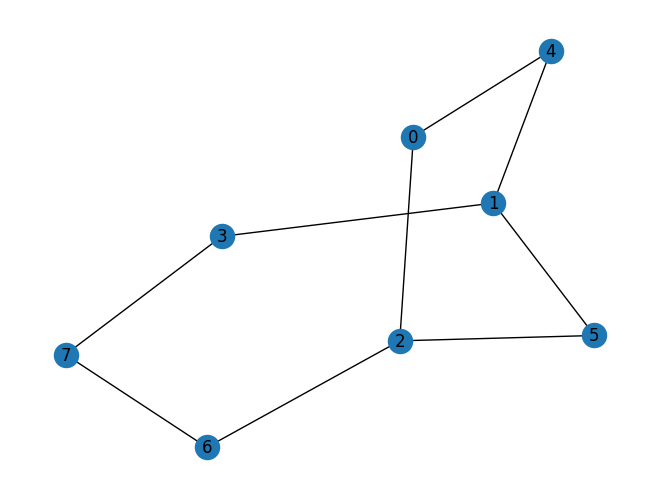

In [32]:
from torch_geometric.utils import k_hop_subgraph, to_networkx, to_undirected, to_scipy_sparse_matrix
import torch
import networkx as nx
from torch_geometric.data import Data
from scipy.sparse.csgraph import shortest_path
# dataset = KarateClub()
# data = dataset[0]
# print(data)
torch.manual_seed(0)
edge_index = torch.tensor([[1,2,3,0,4,5,6,7,1],[5,0,7,4,1,2,2,6,3]])
edge_index = to_undirected(edge_index)
print(edge_index)
x = torch.randint(low=0, high=4, size=(edge_index.unique().size(0), 5))
data = Data(edge_index=edge_index, x=x)
print(data)
G = to_networkx(data, to_undirected= True)
nx.draw(G, with_labels = True)
# edge_label_index = torch.tensor([[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7,0,5,3,5],
#         [2, 4, 3, 4, 5, 0, 5, 6, 1, 7, 0, 1, 1, 2, 2, 7, 3, 6,5,0,5,3]])
edge_label_index = torch.tensor([[1,2,0,3],[3,0,2,1]])

In [34]:
import numpy as np

In [ ]:
print(edge_label_index)


tensor([[1, 2, 0, 3],
        [3, 0, 2, 1]])


In [43]:
for src, dst in edge_label_index.t().tolist():
    sub_nodes, sub_edge_index, mapping, _ = k_hop_subgraph(
        [src, dst], 2, edge_index, relabel_nodes=True)
    src, dst = mapping.tolist()

    # Remove target link from the subgraph.
    mask1 = (sub_edge_index[0] != src) | (sub_edge_index[1] != dst)
    mask2 = (sub_edge_index[0] != dst) | (sub_edge_index[1] != src)
    sub_edge_index = sub_edge_index[:, mask1 & mask2]
    print(src,dst)
    print(sub_edge_index)

1 3
tensor([[0, 0, 1, 1, 2, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7],
        [2, 4, 4, 5, 0, 5, 6, 7, 0, 1, 1, 2, 2, 7, 3, 6]])
2 0
tensor([[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6],
        [3, 3, 4, 4, 5, 0, 1, 1, 2, 2, 6, 5]])
0 2
tensor([[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6],
        [3, 3, 4, 4, 5, 0, 1, 1, 2, 2, 6, 5]])
3 1
tensor([[0, 0, 1, 1, 2, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7],
        [2, 4, 4, 5, 0, 5, 6, 7, 0, 1, 1, 2, 2, 7, 3, 6]])


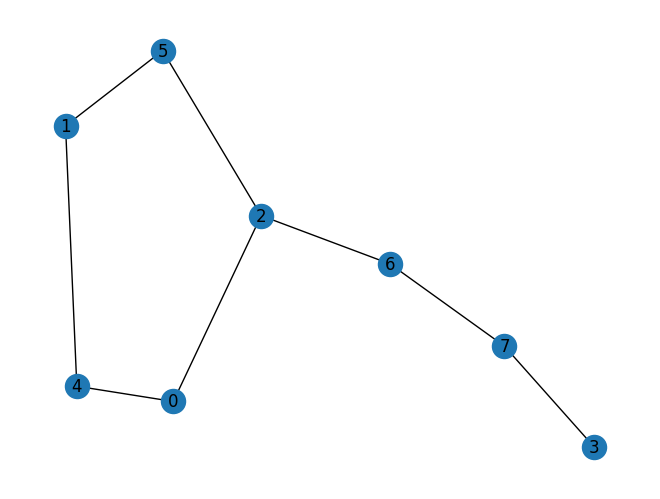

In [80]:
sun_edge_index = torch.tensor([[0, 0, 1, 1, 2, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7],
        [2, 4, 4, 5, 0, 5, 6, 7, 0, 1, 1, 2, 2, 7, 3, 6]])
G = nx.Graph()
G.add_edges_from(sun_edge_index.t().tolist())
nx.draw(G, with_labels = True)
src, dst = [1,3]

In [ ]:
adj = to_scipy_sparse_matrix(sun_edge_index, num_nodes=8).tocsr()
idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
adj_wo_src = adj[idx, :][:, idx]
idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
adj_wo_dst = adj[idx, :][:, idx]
print(src,dst)


1 3


In [74]:
from torch_geometric.utils import from_scipy_sparse_matrix

edge_index_wo_src, edge_attr = from_scipy_sparse_matrix(adj_wo_src)

In [95]:
dist2dst = shortest_path(adj_wo_src, directed=False, unweighted=True, indices=dst - 1)
print(dist2dst)
dist2dst = np.insert(dist2dst, src, 0, axis=0)
dist2dst = torch.from_numpy(dist2dst)
dist2src = shortest_path(adj_wo_dst, directed=False, unweighted=True, indices=src)
dist2src = np.insert(dist2src, dst, 0, axis=0)
dist2src = torch.from_numpy(dist2src)
print(dist2dst, dist2src)

[4. 3. 0. 5. 4. 2. 1.]
tensor([4., 0., 3., 0., 5., 4., 2., 1.], dtype=torch.float64) tensor([2., 0., 2., 0., 1., 1., 3., 4.], dtype=torch.float64)


In [101]:
dist = dist2src + dist2dst
print(dist)
dist_over_2, dist_mod_2 = dist // 2, dist % 2
print(dist_over_2, dist_mod_2)

z = 1 + torch.min(dist2src, dist2dst)
print(z)
z += dist_over_2 * (dist_over_2 + dist_mod_2 - 1)
print(z)
z[src] = 1.
z[dst] = 1.
z[torch.isnan(z)] = 0.

tensor([6., 0., 5., 0., 6., 5., 5., 5.], dtype=torch.float64)
tensor([3., 0., 2., 0., 3., 2., 2., 2.], dtype=torch.float64) tensor([0., 0., 1., 0., 0., 1., 1., 1.], dtype=torch.float64)
tensor([3., 1., 3., 1., 2., 2., 3., 2.], dtype=torch.float64)
tensor([9., 1., 7., 1., 8., 6., 7., 6.], dtype=torch.float64)


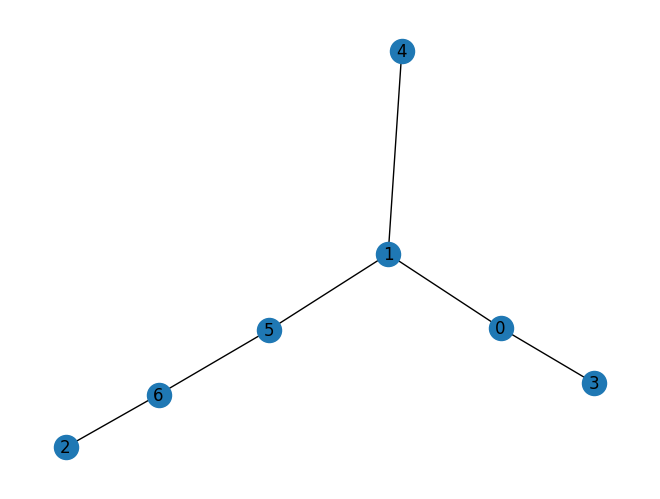

In [75]:
G_wo_src = nx.Graph()
G_wo_src.add_edges_from(edge_index_wo_src.t().tolist())
nx.draw(G_wo_src, with_labels = True)

In [41]:

def drnl_node_labeling(self, edge_index, src, dst, num_nodes=None):
    # Double-radius node labeling (DRNL).
    src, dst = (dst, src) if src > dst else (src, dst)
    adj = to_scipy_sparse_matrix(edge_index, num_nodes=num_nodes).tocsr()

    idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
    adj_wo_src = adj[idx, :][:, idx]

    idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
    adj_wo_dst = adj[idx, :][:, idx]

    dist2src = shortest_path(adj_wo_dst, directed=False, unweighted=True,
                                indices=src)
    dist2src = np.insert(dist2src, dst, 0, axis=0)
    dist2src = torch.from_numpy(dist2src)

    dist2dst = shortest_path(adj_wo_src, directed=False, unweighted=True,
                                indices=dst - 1)
    dist2dst = np.insert(dist2dst, src, 0, axis=0)
    dist2dst = torch.from_numpy(dist2dst)

    dist = dist2src + dist2dst
    dist_over_2, dist_mod_2 = dist // 2, dist % 2

    z = 1 + torch.min(dist2src, dist2dst)
    z += dist_over_2 * (dist_over_2 + dist_mod_2 - 1)
    z[src] = 1.
    z[dst] = 1.
    z[torch.isnan(z)] = 0.

    _max_z = max(int(z.max()), self._max_z)

    return z.to(torch.long)

In [ ]:
def extract_enclosing_subgraphs(self, edge_index, edge_label_index, y):
    data_list = []
    for src, dst in edge_label_index.t().tolist():
        sub_nodes, sub_edge_index, mapping, _ = k_hop_subgraph(
            [src, dst], self.num_hops, edge_index, relabel_nodes=True)
        src, dst = mapping.tolist()

        # Remove target link from the subgraph.
        mask1 = (sub_edge_index[0] != src) | (sub_edge_index[1] != dst)
        mask2 = (sub_edge_index[0] != dst) | (sub_edge_index[1] != src)
        sub_edge_index = sub_edge_index[:, mask1 & mask2]

        # Calculate node labeling.
        z = drnl_node_labeling(sub_edge_index, src, dst,
                                    num_nodes=sub_nodes.size(0))

        data = Data(x=data.x[sub_nodes], z=z,
                    edge_index=sub_edge_index, y=y)
        data_list.append(data)

    return data_list

In [ ]:
data_list = extract_enclosing_subgraphs(self, edge_index, edge_label_index, y)

In [1]:
import argparse
import time
import torch
from torch.utils.data import DataLoader
from torch_sparse import SparseTensor
from model import AutoLink_l3, SearchGraph_l31
import os.path as osp
from torch.autograd import Variable
from torch_geometric.datasets import Planetoid
from logger import Logger
from utils import do_edge_split, evaluate_auc, IndexLoader
from torch_geometric.utils import to_undirected, add_self_loops, negative_sampling
import numpy as np

dataset = Planetoid('./dataset/Cora/Cora/', 'cora')

Processing...
Done!


In [3]:
split_edge = do_edge_split(dataset)
print(split_edge)

c:\Users\86186\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


{'train': {'edge': tensor([[   0,  633],
        [   0, 1862],
        [   1,    2],
        ...,
        [2707,  598],
        [2707, 1473],
        [2707, 2706]]), 'edge_neg': tensor([[1059,  959],
        [ 820, 1230],
        [2682,  965],
        ...,
        [2600, 1508],
        [1568, 2354],
        [ 443,  283]])}, 'valid': {'edge': tensor([[1026, 2034],
        [ 735, 1543],
        [ 741, 1282],
        [ 620, 2534],
        [ 644,  711],
        [  46, 1604],
        [ 283, 2250],
        [ 184,  520],
        [1230, 1342],
        [ 733,  759],
        [ 761, 1443],
        [ 409, 2084],
        [1139, 2054],
        [ 402,  776],
        [ 957, 1557],
        [1623, 1768],
        [ 239, 1759],
        [  95,  861],
        [  61, 2162],
        [1263, 1407],
        [1804, 2451],
        [ 849, 1993],
        [ 148, 2518],
        [ 342, 1072],
        [2476, 2651],
        [2228, 2394],
        [1309, 1625],
        [ 196,  429],
        [  24, 1636],
        [ 625, 102

In [8]:
import difflib
lines1 = open('model.py/AutoLink_Seal.py').readlines()
lines2 = open('model.py/AutoLink_l3Seal.py').readlines()
print(''.join(difflib.unified_diff(lines1, lines2)))

FileNotFoundError: [Errno 2] No such file or directory: 'model.py/AutoLink_Seal.py'